###### Project 2 - Python, W200 Class 12

In [1]:
#Leveraged code from class.  Download the California data (not to your repo!) and load it into a dataframe
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
#contrib = pd.read_csv('qqq_USA_header.dat', index_col=False)
# Note - for now, it is okay to ignore the warning about mixed types.  
#Make sure that your file name matches what is here.
PISA = pd.read_csv('qqq.dat', index_col=False)


C:\Users\Siobhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,26,27,29,31,32,33,34,36,37,38,39,40,42,44,55,62,63,64,68,69,72,73,74,75,76,79,80,84,85,89,93,95,97,100,101,102,107,111,118,119,120,127,129,130,131,132,133,134,135,136,137,138,139,140,144,149,151,153,156,158,160,161,162,175,194,198,199,201,211,212,213,217,218,225,226,248,249,260,270,640,642,643,644,645,646,647,649,655,656,658,660,661,662,668,675,676,677,678,679,680,711,712,716,721,722,723,724,725,807,808,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
PISA.head(10)

,['CNTRYID','CNT','CNTSCHID','CNTSTUID','CYC','NatCen','Region','STRATUM','SUBNATIO','OECD',...,'PV3SSES','PV4SSES','PV5SSES','PV6SSES','PV7SSES','PV8SSES','PV9SSES','PV10SSES','SENWT','VER_DAT']
0,[8.0,'ALB',"800,001.00","803,627.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
1,[8.0,'ALB',"800,001.00","800,454.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
2,[8.0,'ALB',"800,001.00","800,893.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
3,[8.0,'ALB',"800,001.00","804,180.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
4,[8.0,'ALB',"800,001.00","800,491.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
5,[8.0,'ALB',"800,001.00","804,249.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
6,[8.0,'ALB',"800,001.00","804,935.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
7,[8.0,'ALB',"800,001.00","804,320.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
8,[8.0,'ALB',"800,001.00","804,054.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
9,[8.0,'ALB',"800,001.00","800,189.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']


In [6]:
#Set up column names
mylist=[
'CNTRYID',
'CNT',
'CNTSCHID',
'CNTSTUID',
'CYC',
'NatCen',
'Region',
'STRATUM',
'SUBNATIO',
'OECD',
'ADMINMODE',
'Option_CPS',
'Option_FL',
'Option_ICTQ',
'Option_ECQ',
'Option_PQ',
'Option_TQ',
'Option_UH',
'Option_Read',
'Option_Math',
'LANGTEST_QQQ',
'LANGTEST_COG',
'LANGTEST_PAQ',
'CBASCI',
'BOOKID',
'ST001D01T',
'ST003D02T',
'ST003D03T',
'ST004D01T',
'ST005Q01TA',
'ST006Q01TA',
'ST006Q02TA',
'ST006Q03TA',
'ST006Q04TA',
'ST007Q01TA',
'ST008Q01TA',
'ST008Q02TA',
'ST008Q03TA',
'ST008Q04TA',
'ST011Q01TA',
'ST011Q02TA',
'ST011Q03TA',
'ST011Q04TA',
'ST011Q05TA',
'ST011Q06TA',
'ST011Q07TA',
'ST011Q08TA',
'ST011Q09TA',
'ST011Q10TA',
'ST011Q11TA',
'ST011Q12TA',
'ST011Q16NA',
'ST011D17TA',
'ST011D18TA',
'ST011D19TA',
'ST012Q01TA',
'ST012Q02TA',
'ST012Q03TA',
'ST012Q05NA',
'ST012Q06NA',
'ST012Q07NA',
'ST012Q08NA',
'ST012Q09NA',
'ST013Q01TA',
'ST123Q01NA',
'ST123Q02NA',
'ST123Q03NA',
'ST123Q04NA',
'ST019AQ01T',
'ST019BQ01T',
'ST019CQ01T',
'ST021Q01TA',
'ST022Q01TA',
'ST124Q01TA',
'ST125Q01NA',
'ST126Q01TA',
'ST127Q01TA',
'ST127Q02TA',
'ST127Q03TA',
'ST111Q01TA',
'ST118Q01NA',
'ST118Q02NA',
'ST118Q03NA',
'ST118Q04NA',
'ST118Q05NA',
'ST119Q01NA',
'ST119Q02NA',
'ST119Q03NA',
'ST119Q04NA',
'ST119Q05NA',
'ST121Q01NA',
'ST121Q02NA',
'ST121Q03NA',
'ST082Q01NA',
'ST082Q02NA',
'ST082Q03NA',
'ST082Q08NA',
'ST082Q09NA',
'ST082Q12NA',
'ST082Q13NA',
'ST082Q14NA',
'ST034Q01TA',
'ST034Q02TA',
'ST034Q03TA',
'ST034Q04TA',
'ST034Q05TA',
'ST034Q06TA',
'ST039Q01NA',
'ST039Q02NA',
'ST039Q03NA',
'ST039Q04NA',
'ST039Q05NA',
'ST039Q06NA',
'ST059Q01TA',
'ST059Q02TA',
'ST059Q03TA',
'ST060Q01NA',
'ST061Q01NA',
'ST062Q01TA',
'ST062Q02TA',
'ST062Q03TA',
'ST071Q01NA',
'ST071Q02NA',
'ST071Q03NA',
'ST071Q04NA',
'ST071Q05NA',
'ST031Q01NA',
'ST032Q01NA',
'ST032Q02NA',
'ST063Q01NA',
'ST063Q01NB',
'ST063Q02NA',
'ST063Q02NB',
'ST063Q03NA',
'ST063Q03NB',
'ST063Q04NA',
'ST063Q04NB',
'ST063Q05NA',
'ST063Q05NB',
'ST063Q06NA',
'ST063Q06NB',
'ST064Q01NA',
'ST064Q02NA',
'ST064Q03NA',
'ST097Q01TA',
'ST097Q02TA',
'ST097Q03TA',
'ST097Q04TA',
'ST097Q05TA',
'ST098Q01TA',
'ST098Q02TA',
'ST098Q03NA',
'ST098Q05TA',
'ST098Q06TA',
'ST098Q07TA',
'ST098Q08NA',
'ST098Q09TA',
'ST098Q10NA',
'ST100Q01TA',
'ST100Q02TA',
'ST100Q03TA',
'ST100Q04TA',
'ST100Q05TA',
'ST103Q01NA',
'ST103Q03NA',
'ST103Q08NA',
'ST103Q11NA',
'ST104Q01NA',
'ST104Q02NA',
'ST104Q03NA',
'ST104Q04NA',
'ST104Q05NA',
'ST107Q01NA',
'ST107Q02NA',
'ST107Q03NA',
'ST092Q01TA',
'ST092Q02TA',
'ST092Q04TA',
'ST092Q05TA',
'ST092Q06NA',
'ST092Q08NA',
'ST092Q09NA',
'ST093Q01TA',
'ST093Q03TA',
'ST093Q04TA',
'ST093Q05TA',
'ST093Q06TA',
'ST093Q07NA',
'ST093Q08NA',
'ST094Q01NA',
'ST094Q02NA',
'ST094Q03NA',
'ST094Q04NA',
'ST094Q05NA',
'ST095Q04NA',
'ST095Q07NA',
'ST095Q08NA',
'ST095Q13NA',
'ST095Q15NA',
'ST113Q01TA',
'ST113Q02TA',
'ST113Q03TA',
'ST113Q04TA',
'ST129Q01TA',
'ST129Q02TA',
'ST129Q03TA',
'ST129Q04TA',
'ST129Q05TA',
'ST129Q06TA',
'ST129Q07TA',
'ST129Q08TA',
'ST131Q01NA',
'ST131Q03NA',
'ST131Q04NA',
'ST131Q06NA',
'ST131Q08NA',
'ST131Q11NA',
'ST146Q01TA',
'ST146Q02TA',
'ST146Q03TA',
'ST146Q04TA',
'ST146Q05TA',
'ST146Q06NA',
'ST146Q07NA',
'ST146Q08NA',
'ST146Q09NA',
'ST076Q01NA',
'ST076Q02NA',
'ST076Q03NA',
'ST076Q04NA',
'ST076Q05NA',
'ST076Q06NA',
'ST076Q07NA',
'ST076Q08NA',
'ST076Q09NA',
'ST076Q10NA',
'ST076Q11NA',
'ST078Q01NA',
'ST078Q02NA',
'ST078Q03NA',
'ST078Q04NA',
'ST078Q05NA',
'ST078Q06NA',
'ST078Q07NA',
'ST078Q08NA',
'ST078Q09NA',
'ST078Q10NA',
'ST078Q11NA',
'ST065Class',
'IC001Q01TA',
'IC001Q02TA',
'IC001Q03TA',
'IC001Q04TA',
'IC001Q05TA',
'IC001Q06TA',
'IC001Q07TA',
'IC001Q08TA',
'IC001Q09TA',
'IC001Q10TA',
'IC001Q11TA',
'IC009Q01TA',
'IC009Q02TA',
'IC009Q03TA',
'IC009Q05NA',
'IC009Q06NA',
'IC009Q07NA',
'IC009Q08TA',
'IC009Q09TA',
'IC009Q10NA',
'IC009Q11NA',
'IC002Q01NA',
'IC003Q01TA',
'IC004Q01TA',
'IC005Q01TA',
'IC006Q01TA',
'IC007Q01TA',
'IC008Q01TA',
'IC008Q02TA',
'IC008Q03TA',
'IC008Q04TA',
'IC008Q05TA',
'IC008Q07NA',
'IC008Q08TA',
'IC008Q09TA',
'IC008Q10TA',
'IC008Q11TA',
'IC008Q12TA',
'IC008Q13NA',
'IC010Q01TA',
'IC010Q02NA',
'IC010Q03TA',
'IC010Q04TA',
'IC010Q05NA',
'IC010Q06NA',
'IC010Q07TA',
'IC010Q08TA',
'IC010Q09NA',
'IC010Q10NA',
'IC010Q11NA',
'IC010Q12NA',
'IC011Q01TA',
'IC011Q02TA',
'IC011Q03TA',
'IC011Q04TA',
'IC011Q05TA',
'IC011Q06TA',
'IC011Q07TA',
'IC011Q08TA',
'IC011Q09TA',
'IC013Q01NA',
'IC013Q04NA',
'IC013Q05NA',
'IC013Q11NA',
'IC013Q12NA',
'IC013Q13NA',
'IC014Q03NA',
'IC014Q04NA',
'IC014Q06NA',
'IC014Q08NA',
'IC014Q09NA',
'IC015Q02NA',
'IC015Q03NA',
'IC015Q05NA',
'IC015Q07NA',
'IC015Q09NA',
'IC016Q01NA',
'IC016Q02NA',
'IC016Q04NA',
'IC016Q05NA',
'IC016Q07NA',
'EC001Q01NA',
'EC001Q02NA',
'EC001Q03NA',
'EC001Q04NA',
'EC001Q05NA',
'EC001Q06NA',
'EC001Q07NA',
'EC001Q08NA',
'EC001Q09NA',
'EC001Q10NA',
'EC003Q01NA',
'EC003Q02NA',
'EC003Q03NA',
'EC003Q04NA',
'EC003Q05NA',
'EC003Q06NA',
'EC004Q01NA',
'EC004Q02NA',
'EC005Q01NA',
'EC005Q02NA',
'EC005Q03NA',
'EC005Q04NA',
'EC005Q05NA',
'EC005Q06NA',
'EC005Q07NA',
'EC005Q08NA',
'EC007Q01NA',
'EC007Q02NA',
'EC008Q01NA',
'EC008Q02NA',
'EC008Q03NA',
'EC008Q04NA',
'EC009Q03NA',
'EC009Q07NA',
'EC009Q10NA',
'EC009Q12NA',
'EC009Q13NA',
'EC009Q14NA',
'EC010Q04NA',
'EC010Q06NA',
'EC010Q07NA',
'EC010Q08NA',
'EC010Q09NA',
'EC010Q10NA',
'EC010Q11NA',
'EC010Q12NA',
'EC011Q01NA',
'EC011Q02NA',
'EC011Q03NA',
'EC011Q04NA',
'EC011Q05NA',
'EC012Q01NA',
'EC012Q02NA',
'EC012Q03NA',
'EC012Q04NA',
'EC012Q05NA',
'EC012Q06NA',
'EC012Q07NA',
'EC012Q08NA',
'EC012Q09NA',
'EC012Q10NA',
'EC012Q11NA',
'EC012Q12NA',
'EC013Q01NA',
'EC013Q02NA',
'EC013Q03NA',
'EC013Q04NA',
'EC013Q05NA',
'EC013Q06NA',
'EC013Q07NA',
'EC013Q08NA',
'EC013Q09NA',
'EC013Q10NA',
'EC013Q11NA',
'EC013Q12NA',
'EC013Q13NA',
'EC014Q01NA',
'EC014Q02NA',
'EC015Q01NA',
'EC015Q02NA',
'EC015Q03NA',
'EC015Q04NA',
'EC015Q05NA',
'EC015Q06NA',
'EC015Q07NA',
'EC015Q08NA',
'EC017Q01NA',
'EC017Q02NA',
'EC018Q01NA',
'EC018Q02NA',
'EC018Q03NA',
'EC018Q04NA',
'EC019Q03NA',
'EC019Q07NA',
'EC019Q10NA',
'EC019Q12NA',
'EC019Q13NA',
'EC019Q14NA',
'EC020Q04NA',
'EC020Q06NA',
'EC020Q07NA',
'EC020Q08NA',
'EC020Q09NA',
'EC020Q10NA',
'EC020Q11NA',
'EC020Q12NA',
'EC021Q01NA',
'EC021Q02NA',
'EC021Q03NA',
'EC021Q04NA',
'EC021Q05NA',
'EC022Q01NA',
'EC022Q02NA',
'EC022Q03NA',
'EC022Q04NA',
'EC022Q05NA',
'EC022Q06NA',
'EC022Q07NA',
'EC022Q08NA',
'EC022Q09NA',
'EC022Q10NA',
'EC022Q11NA',
'EC022Q12NA',
'EC023Q01NA',
'EC023Q02NA',
'EC023Q03NA',
'EC023Q04NA',
'EC023Q05NA',
'EC023Q06NA',
'EC023Q07NA',
'EC023Q08NA',
'EC023Q09NA',
'EC023Q10NA',
'EC023Q11NA',
'EC023Q12NA',
'EC023Q13NA',
'EC024Q01NA',
'EC024Q02NA',
'EC024Q03NA',
'EC024Q04NA',
'EC024Q05NA',
'EC024Q06NA',
'EC024Q07NA',
'EC024Q08NA',
'EC026Q01NA',
'EC026Q02NA',
'EC027Q01NA',
'EC027Q02NA',
'EC027Q03NA',
'EC027Q04NA',
'EC028Q01NA',
'EC028Q02NA',
'EC028Q03NA',
'EC029Q01NA',
'EC030Q01NA',
'EC030Q02NA',
'EC030Q03NA',
'EC030Q04NA',
'EC030Q05NA',
'EC030Q06NA',
'EC030Q07NA',
'EC031Q01TA',
'EC032Q01TA',
'EC033Q01NA',
'PA001Q01TA',
'PA001Q02TA',
'PA001Q03TA',
'PA002Q01TA',
'PA002Q02TA',
'PA002Q03TA',
'PA002Q04TA',
'PA002Q05TA',
'PA002Q06NA',
'PA002Q07NA',
'PA002Q08NA',
'PA002Q09NA',
'PA002Q10NA',
'PA003Q01TA',
'PA003Q02TA',
'PA003Q03TA',
'PA003Q04NA',
'PA003Q05NA',
'PA003Q06NA',
'PA003Q07NA',
'PA003Q08NA',
'PA004Q01NA',
'PA004Q02NA',
'PA004Q03NA',
'PA004Q04NA',
'PA005Q01TA',
'PA006Q01TA',
'PA006Q02TA',
'PA006Q03TA',
'PA006Q04TA',
'PA006Q05TA',
'PA006Q06TA',
'PA006Q07TA',
'PA006Q08TA',
'PA006Q09TA',
'PA006Q10TA',
'PA006Q11TA',
'PA007Q01TA',
'PA007Q02TA',
'PA007Q03TA',
'PA007Q04TA',
'PA007Q05TA',
'PA007Q06TA',
'PA007Q07TA',
'PA007Q09NA',
'PA007Q11NA',
'PA007Q12NA',
'PA007Q13NA',
'PA007Q14NA',
'PA007Q15NA',
'PA008Q01TA',
'PA008Q02TA',
'PA008Q03TA',
'PA008Q04TA',
'PA008Q05TA',
'PA008Q06NA',
'PA008Q07NA',
'PA008Q08NA',
'PA008Q09NA',
'PA008Q10NA',
'PA009Q01NA',
'PA009Q02NA',
'PA009Q03NA',
'PA009Q04NA',
'PA009Q05NA',
'PA009Q06NA',
'PA009Q08NA',
'PA009Q09NA',
'PA009Q10NA',
'PA009Q11NA',
'PA011Q01NA',
'PA011Q02NA',
'PA011Q03NA',
'PA014Q01NA',
'PA018Q01NA',
'PA018Q02NA',
'PA018Q03NA',
'PA019Q01NA',
'PA019Q02NA',
'PA019Q03NA',
'PA019Q04NA',
'PA019Q05NA',
'PA019Q06NA',
'PA019Q07NA',
'PA019Q08NA',
'PA020Q01NA',
'PA020Q02NA',
'PA020Q03NA',
'PA020Q04NA',
'PA021Q01NA',
'PA021Q02NA',
'PA021Q03NA',
'PA021Q04NA',
'PA022Q01NA',
'PA023Q01NA',
'PA023Q02NA',
'PA023Q03NA',
'PA023Q04NA',
'PA023Q05NA',
'PA023Q06NA',
'PA023Q07NA',
'PA023Q08NA',
'PA026Q01NA',
'PA027Q01NA',
'PA027Q02NA',
'PA027Q03NA',
'PA027Q04NA',
'PA027Q05NA',
'PA027Q06NA',
'PA027Q07NA',
'PA027Q08NA',
'PA028Q01NA',
'PA029Q01NA',
'PA030Q01NA',
'PA032Q01TA',
'PA032Q02TA',
'PA032Q03TA',
'PA032Q04TA',
'PA032Q05TA',
'PA033Q02TA',
'PA033Q06TA',
'PA033Q07TA',
'PA033Q08TA',
'PA033Q09TA',
'PA035Q01TA',
'PA035Q03TA',
'PA035Q04TA',
'PA035Q05TA',
'PA035Q06TA',
'PA035Q07NA',
'PA035Q08NA',
'PA036Q01TA',
'PA036Q03TA',
'PA036Q04TA',
'PA036Q05TA',
'PA036Q06TA',
'PA036Q07NA',
'PA036Q08NA',
'PA039Q01TA',
'PA039Q02TA',
'PA039Q03TA',
'PA039Q04TA',
'PA039Q05TA',
'PA039Q06TA',
'PA041Q01TA',
'PA042Q01TA',
'AGE',
'PROGN',
'ISCEDL',
'ISCEDD',
'ISCEDO',
'DISCLISCI',
'TEACHSUP',
'IBTEACH',
'TDTEACH',
'ENVAWARE',
'ENVOPT',
'JOYSCIE',
'INTBRSCI',
'INSTSCIE',
'SCIEEFF',
'EPIST',
'SCIEACT',
'BSMJ',
'GRADE',
'IMMIG',
'MISCED',
'FISCED',
'HISCED',
'HOMESCH',
'ENTUSE',
'BMMJ1',
'BFMJ2',
'hisei',
'REPEAT',
'DURECEC',
'OUTHOURS',
'MMINS',
'LMINS',
'SMINS',
'TMINS',
'BELONG',
'ANXTEST',
'MOTIVAT',
'COOPERATE',
'CPSVALUE',
'EMOSUPS',
'PERFEED',
'ADINST',
'SCCHANGE',
'CHANGE',
'SADDINST',
'HADDINST',
'ADDSCIIN',
'COMSCSUP',
'COMSCSTRLE',
'COMSCSTRCO',
'COMSCTSREL',
'COMMASUP',
'COMMASTRLE',
'COMMASTRCO',
'COMMATSREL',
'USESCH',
'INTICT',
'COMPICT',
'AUTICT',
'SOIAICT',
'ICTHOME',
'ICTSCH',
'PRESUPP',
'CURSUPP',
'EMOSUPP',
'PQSCHOOL',
'PASCHPOL',
'PQGENSCI',
'PQENPERC',
'PQENVOPT',
'unfairteacher',
'PARED',
'COBN_F',
'COBN_M',
'COBN_S',
'LANGN',
'OCOD1',
'OCOD2',
'OCOD3',
'CULTPOSS',
'HEDRES',
'HOMEPOS',
'ICTRES',
'WEALTH',
'ESCS',
'W_FSTUWT',
'W_FSTURWT1',
'W_FSTURWT2',
'W_FSTURWT3',
'W_FSTURWT4',
'W_FSTURWT5',
'W_FSTURWT6',
'W_FSTURWT7',
'W_FSTURWT8',
'W_FSTURWT9',
'W_FSTURWT10',
'W_FSTURWT11',
'W_FSTURWT12',
'W_FSTURWT13',
'W_FSTURWT14',
'W_FSTURWT15',
'W_FSTURWT16',
'W_FSTURWT17',
'W_FSTURWT18',
'W_FSTURWT19',
'W_FSTURWT20',
'W_FSTURWT21',
'W_FSTURWT22',
'W_FSTURWT23',
'W_FSTURWT24',
'W_FSTURWT25',
'W_FSTURWT26',
'W_FSTURWT27',
'W_FSTURWT28',
'W_FSTURWT29',
'W_FSTURWT30',
'W_FSTURWT31',
'W_FSTURWT32',
'W_FSTURWT33',
'W_FSTURWT34',
'W_FSTURWT35',
'W_FSTURWT36',
'W_FSTURWT37',
'W_FSTURWT38',
'W_FSTURWT39',
'W_FSTURWT40',
'W_FSTURWT41',
'W_FSTURWT42',
'W_FSTURWT43',
'W_FSTURWT44',
'W_FSTURWT45',
'W_FSTURWT46',
'W_FSTURWT47',
'W_FSTURWT48',
'W_FSTURWT49',
'W_FSTURWT50',
'W_FSTURWT51',
'W_FSTURWT52',
'W_FSTURWT53',
'W_FSTURWT54',
'W_FSTURWT55',
'W_FSTURWT56',
'W_FSTURWT57',
'W_FSTURWT58',
'W_FSTURWT59',
'W_FSTURWT60',
'W_FSTURWT61',
'W_FSTURWT62',
'W_FSTURWT63',
'W_FSTURWT64',
'W_FSTURWT65',
'W_FSTURWT66',
'W_FSTURWT67',
'W_FSTURWT68',
'W_FSTURWT69',
'W_FSTURWT70',
'W_FSTURWT71',
'W_FSTURWT72',
'W_FSTURWT73',
'W_FSTURWT74',
'W_FSTURWT75',
'W_FSTURWT76',
'W_FSTURWT77',
'W_FSTURWT78',
'W_FSTURWT79',
'W_FSTURWT80',
'UNIT',
'WVARSTRR',
'PV1MATH',
'PV2MATH',
'PV3MATH',
'PV4MATH',
'PV5MATH',
'PV6MATH',
'PV7MATH',
'PV8MATH',
'PV9MATH',
'PV10MATH',
'PV1READ',
'PV2READ',
'PV3READ',
'PV4READ',
'PV5READ',
'PV6READ',
'PV7READ',
'PV8READ',
'PV9READ',
'PV10READ',
'PV1SCIE',
'PV2SCIE',
'PV3SCIE',
'PV4SCIE',
'PV5SCIE',
'PV6SCIE',
'PV7SCIE',
'PV8SCIE',
'PV9SCIE',
'PV10SCIE',
'PV1SCEP',
'PV2SCEP',
'PV3SCEP',
'PV4SCEP',
'PV5SCEP',
'PV6SCEP',
'PV7SCEP',
'PV8SCEP',
'PV9SCEP',
'PV10SCEP',
'PV1SCED',
'PV2SCED',
'PV3SCED',
'PV4SCED',
'PV5SCED',
'PV6SCED',
'PV7SCED',
'PV8SCED',
'PV9SCED',
'PV10SCED',
'PV1SCID',
'PV2SCID',
'PV3SCID',
'PV4SCID',
'PV5SCID',
'PV6SCID',
'PV7SCID',
'PV8SCID',
'PV9SCID',
'PV10SCID',
'PV1SKCO',
'PV2SKCO',
'PV3SKCO',
'PV4SKCO',
'PV5SKCO',
'PV6SKCO',
'PV7SKCO',
'PV8SKCO',
'PV9SKCO',
'PV10SKCO',
'PV1SKPE',
'PV2SKPE',
'PV3SKPE',
'PV4SKPE',
'PV5SKPE',
'PV6SKPE',
'PV7SKPE',
'PV8SKPE',
'PV9SKPE',
'PV10SKPE',
'PV1SSPH',
'PV2SSPH',
'PV3SSPH',
'PV4SSPH',
'PV5SSPH',
'PV6SSPH',
'PV7SSPH',
'PV8SSPH',
'PV9SSPH',
'PV10SSPH',
'PV1SSLI',
'PV2SSLI',
'PV3SSLI',
'PV4SSLI',
'PV5SSLI',
'PV6SSLI',
'PV7SSLI',
'PV8SSLI',
'PV9SSLI',
'PV10SSLI',
'PV1SSES',
'PV2SSES',
'PV3SSES',
'PV4SSES',
'PV5SSES',
'PV6SSES',
'PV7SSES',
'PV8SSES',
'PV9SSES',
'PV10SSES',
'SENWT',
'VER_DAT'
]



In [7]:
#Apply these column names
PISA.columns = list(mylist)


In [9]:
#Data has leading spaces
PISA['CNT'] = PISA['CNT'].map(lambda x: x.strip())

In [10]:
#Validate the spaces are removed
PISA.CNT.min()

"'ALB'"

In [11]:
#For all values that we use, we should clean them up and strip out blank spaces
PISA['ST011Q16NA'] = PISA['ST011Q16NA'].map(lambda x: x.strip())

In [14]:
PISA[PISA.ST011Q16NA == "1.0"].head(10)

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,PV3SSES,PV4SSES,PV5SSES,PV6SSES,PV7SSES,PV8SSES,PV9SSES,PV10SSES,SENWT,VER_DAT
5217,[12.0,'DZA',"1,200,001.00","1,206,012.00",'06MS','001200',"1,200.00",'DZA0006','0120000',0.00,...,None,None,None,None,None,None,None,None,0.62,'15NOV16:10:23:49']
5218,[12.0,'DZA',"1,200,001.00","1,202,308.00",'06MS','001200',"1,200.00",'DZA0006','0120000',0.00,...,None,None,None,None,None,None,None,None,0.70,'15NOV16:10:23:49']
5234,[12.0,'DZA',"1,200,001.00","1,202,921.00",'06MS','001200',"1,200.00",'DZA0006','0120000',0.00,...,None,None,None,None,None,None,None,None,0.70,'15NOV16:10:23:49']
5235,[12.0,'DZA',"1,200,001.00","1,204,095.00",'06MS','001200',"1,200.00",'DZA0006','0120000',0.00,...,None,None,None,None,None,None,None,None,0.62,'15NOV16:10:23:49']
5236,[12.0,'DZA',"1,200,001.00","1,202,968.00",'06MS','001200',"1,200.00",'DZA0006','0120000',0.00,...,None,None,None,None,None,None,None,None,0.62,'15NOV16:10:23:49']
5238,[12.0,'DZA',"1,200,001.00","1,203,172.00",'06MS','001200',"1,200.00",'DZA0006','0120000',0.00,...,None,None,None,None,None,None,None,None,0.62,'15NOV16:10:23:49']
5239,[12.0,'DZA',"1,200,001.00","1,202,029.00",'06MS','001200',"1,200.00",'DZA0006','0120000',0.00,...,None,None,None,None,None,None,None,None,0.62,'15NOV16:10:23:49']
5242,[12.0,'DZA',"1,200,001.00","1,205,707.00",'06MS','001200',"1,200.00",'DZA0006','0120000',0.00,...,None,None,None,None,None,None,None,None,0.62,'15NOV16:10:23:49']
5251,[12.0,'DZA',"1,200,002.00","1,203,802.00",'06MS','001200',"1,200.00",'DZA0003','0120000',0.00,...,None,None,None,None,None,None,None,None,0.77,'15NOV16:10:23:49']
5255,[12.0,'DZA',"1,200,002.00","1,204,218.00",'06MS','001200',"1,200.00",'DZA0003','0120000',0.00,...,None,None,None,None,None,None,None,None,0.77,'15NOV16:10:23:49']


In [14]:
#1 = Female, 2 = Male
PISA.ST004D01T.value_counts()

1.00    260245
2.00    259089
Name: ST004D01T, dtype: int64

In [20]:
#Add columns for the means for reading, math, and science scores.
PISA = PISA.assign(ReadScore =(PISA.PV1READ.astype('float') + PISA.PV2READ.astype('float') + PISA.PV3READ.astype('float') + PISA.PV4READ.astype('float') + PISA.PV5READ.astype('float') + PISA.PV6READ.astype('float') + PISA.PV7READ.astype('float') + PISA.PV8READ.astype('float') + PISA.PV9READ.astype('float')+ PISA.PV10READ.astype('float'))/10)         
PISA = PISA.assign(MathScore =(PISA.PV1MATH.astype('float') + PISA.PV2MATH.astype('float') + PISA.PV3MATH.astype('float') + PISA.PV4MATH.astype('float') + PISA.PV5MATH.astype('float') + PISA.PV6MATH.astype('float') + PISA.PV7MATH.astype('float') + PISA.PV8MATH.astype('float') + PISA.PV9MATH.astype('float')+ PISA.PV10MATH.astype('float'))/10)         
PISA = PISA.assign(ScieScore =(PISA.PV1SCIE.astype('float') + PISA.PV2SCIE.astype('float') + PISA.PV3SCIE.astype('float') + PISA.PV4SCIE.astype('float') + PISA.PV5SCIE.astype('float') + PISA.PV6SCIE.astype('float') + PISA.PV7SCIE.astype('float') + PISA.PV8SCIE.astype('float') + PISA.PV9SCIE.astype('float')+ PISA.PV10SCIE.astype('float'))/10)         


In [21]:
PISA.ReadScore.head(10)

0   464.72
1   421.99
2   531.48
3   530.62
4   401.81
5   453.56
6   509.47
7   438.85
8   435.89
9   410.34
Name: ReadScore, dtype: float64

In [29]:
#Cut the data into deciles.
PISA = PISA.assign(MathRank =pd.qcut(PISA.MathScore, 10,  labels=["1","2","3","4","5","6","7","8","9","10"]))


In [30]:
PISA.groupby('MathRank').agg({'MathScore':np.max})

,MathScore
MathRank,
1,334.79
10,826.34
2,374.72
3,406.61
4,435.57
5,463.28
6,490.91
7,519.35
8,550.89


In [104]:
#Filtering to top decile
PISA_10_all =  PISA[(PISA['MathRank'] == '10')]

In [106]:
#Grabbing counts for genders/countries
all_group = pd.DataFrame(PISA_10_all.groupby([ 'CNT', 'ST004D01T']).size())

In [113]:
#reformats data frame
all_group_un = pd.DataFrame(all_group.unstack())

In [114]:
#still have multi index though and i cant figure out how to work with the data like that
all_group_un.columns

MultiIndex(levels=[[0], [1.0, 2.0]],
           labels=[[0, 0], [0, 1]],
           names=[None, 'ST004D01T'])

In [163]:
# Puts it back in a normal data frame with columns
y = all_group_un.reset_index()

In [164]:
y.head(10)

CNT        0         
ST004D01T             1.0      2.0
0          'ALB'    15.00    32.00
1          'ARE'   203.00   360.00
2          'AUS'   691.00   992.00
3          'AUT'   361.00   720.00
4          'BEL'   775.00 1,175.00
5          'BGR'   120.00   177.00
6          'BRA'    53.00   103.00
7          'CAN' 1,152.00 1,623.00
8          'CHE'   516.00   804.00
9          'CHL'    74.00   157.00

In [167]:
all_group_un_cols=['Country', 'Female', 'Male']

In [168]:
y.columns = all_group_un_cols

In [173]:
y.Female.head(10)

0      15.00
1     203.00
2     691.00
3     361.00
4     775.00
5     120.00
6      53.00
7   1,152.00
8     516.00
9      74.00
Name: Female, dtype: float64

In [233]:
y = y.assign(TotalCnt =(y.Female + y.Male))

In [174]:
y = y.assign(FemalePct =y.Female/(y.Female + y.Male))
#             pd.qcut(PISA.MathScore, 10,  labels=["1","2","3","4","5","6","7","8","9","10"]))

In [234]:
y.head(10)

,Country,Female,Male,FemalePct,TotalCnt
0,'ALB',15.00,32.00,0.32,47.00
1,'ARE',203.00,360.00,0.36,563.00
2,'AUS',691.00,992.00,0.41,"1,683.00"
3,'AUT',361.00,720.00,0.33,"1,081.00"
4,'BEL',775.00,"1,175.00",0.40,"1,950.00"
5,'BGR',120.00,177.00,0.40,297.00
6,'BRA',53.00,103.00,0.34,156.00
7,'CAN',"1,152.00","1,623.00",0.42,"2,775.00"
8,'CHE',516.00,804.00,0.39,"1,320.00"
9,'CHL',74.00,157.00,0.32,231.00


In [205]:
z = y[['Country', 'FemalePct']]

In [232]:
y

,Country,Female,Male,FemalePct
0,'ALB',15.00,32.00,0.32
1,'ARE',203.00,360.00,0.36
2,'AUS',691.00,992.00,0.41
3,'AUT',361.00,720.00,0.33
4,'BEL',775.00,"1,175.00",0.40
5,'BGR',120.00,177.00,0.40
6,'BRA',53.00,103.00,0.34
7,'CAN',"1,152.00","1,623.00",0.42
8,'CHE',516.00,804.00,0.39
9,'CHL',74.00,157.00,0.32


In [257]:
z_biggest = y.nlargest(10, columns='FemalePct').sort_values('TotalCnt')


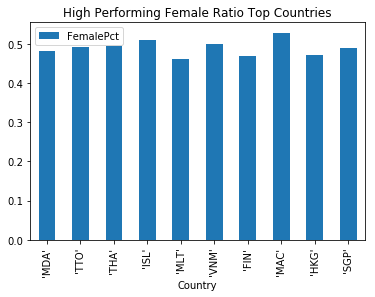

In [264]:
plta = z_biggest.plot.bar(x='Country',y=['FemalePct'],  label='Female  Pct', title ="High Performing Female Ratio Top Countries")

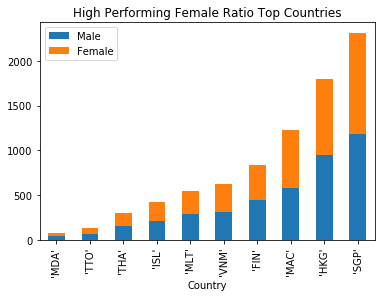

In [249]:
plta = z_biggest.plot.bar(x='Country',y=['Male', 'Female'],  stacked=True, title ="High Performing Female Ratio Top Countries")

In [250]:
z_smallest = y.nsmallest(10, columns='FemalePct').sort_values('TotalCnt')

In [251]:
z_smallest

,Country,Female,Male,FemalePct,TotalCnt
32,'JOR',1.00,7.00,0.12,8.00
42,'MEX',7.00,15.00,0.32,22.00
0,'ALB',15.00,32.00,0.32,47.00
10,'COL',14.00,34.00,0.29,48.00
52,'QAR',14.00,54.00,0.21,68.00
45,'MNE',24.00,55.00,0.30,79.00
36,'LBN',31.00,65.00,0.32,96.00
70,'URY',37.00,96.00,0.28,133.00
9,'CHL',74.00,157.00,0.32,231.00
28,'IRL',222.00,486.00,0.31,708.00


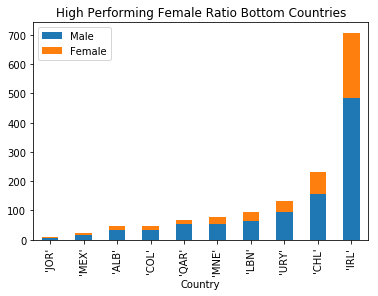

In [254]:
plta = z_smallest.plot.bar(x='Country',y=['Male', 'Female'],  stacked=True, title ="High Performing Female Ratio Bottom Countries")

In [258]:
z_most = y.nlargest(10, columns='TotalCnt').sort_values('TotalCnt')

In [259]:
z_most

,Country,Female,Male,FemalePct,TotalCnt
33,'JPN',691.00,950.00,0.42,"1,641.00"
31,'ITA',606.00,"1,062.00",0.36,"1,668.00"
2,'AUS',691.00,992.00,0.41,"1,683.00"
24,'HKG',849.00,951.00,0.47,"1,800.00"
4,'BEL',775.00,"1,175.00",0.40,"1,950.00"
61,'SGP',"1,133.00","1,182.00",0.49,"2,315.00"
65,'TAP',"1,151.00","1,357.00",0.46,"2,508.00"
7,'CAN',"1,152.00","1,623.00",0.42,"2,775.00"
55,'QES',"1,127.00","1,917.00",0.37,"3,044.00"
54,'QCH',"1,473.00","1,779.00",0.45,"3,252.00"


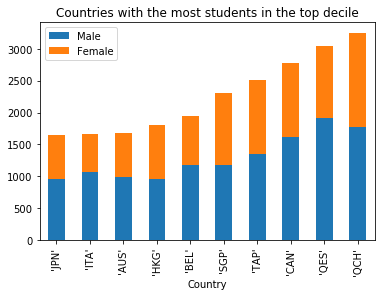

In [260]:
plta = z_most.plot.bar(x='Country',y=['Male', 'Female'],  stacked=True, title ="Countries with the most students in the top decile")

In [292]:
country= PISA.groupby('CNT').agg({'CNT':np.size})

In [180]:
import matplotlib.pyplot
import pylab